<a href="https://colab.research.google.com/github/hadil1999-creator/P2M-/blob/main/P2M_continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the two scenarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1= pd.read_csv(r"/content/scenario1.csv")
df1

,scope_item_id,assessment_id,N2O,CO2,CH4,Other,total
0,1.0,1,3.0,624.0,1.0,0.0,628.0
1,1.0,3,0.0,787.0,0.0,12.0,799.0
2,1.0,4,0.0,19686.0,0.0,0.0,19686.0
3,1.0,7,1.0,17487.0,2.0,0.0,17490.0
4,1.0,8,0.0,918.0,0.0,0.0,918.0
...,...,...,...,...,...,...,...
11858,6.0,7576,NaN,NaN,NaN,NaN,1375.0
11859,6.0,7577,NaN,NaN,NaN,NaN,34931.0
11860,6.0,7578,NaN,NaN,NaN,NaN,1454.0
11861,6.0,7588,NaN,NaN,NaN,NaN,110.0


In [ ]:
df2= pd.read_csv(r"/content/scenario2.csv")
df2

,id,organization_type,staff,population,reporting_year,total_scope_1,total_scope_2,total_scope_3
0,1,1,6848.0,NaN,2011.0,6017.0,2170.0,59931.0
1,3,2,261.0,NaN,2011.0,824.0,382.0,0.0
2,4,3,3000.0,94000.0,2010.0,19811.0,0.0,48674.0
3,7,2,557.0,NaN,2011.0,17802.0,23319.0,0.0
4,8,1,2711.0,NaN,2012.0,4132.0,2432.0,0.0
...,...,...,...,...,...,...,...,...
2360,7576,1,700.0,NaN,2019.0,12647.0,1375.0,0.0
2361,7577,1,9134.0,NaN,2020.0,15851.0,35389.0,280232.0
2362,7578,1,560.0,NaN,2019.0,24596.0,1454.0,0.0
2363,7588,1,612.0,NaN,2020.0,439.0,110.0,57004.0


In [ ]:
df2["population"]=df2["population"].fillna(df2["population"].mean())
df2

,id,organization_type,staff,population,reporting_year,total_scope_1,total_scope_2,total_scope_3
0,1,1,6848.0,475014.179167,2011.0,6017.0,2170.0,59931.0
1,3,2,261.0,475014.179167,2011.0,824.0,382.0,0.0
2,4,3,3000.0,94000.000000,2010.0,19811.0,0.0,48674.0
3,7,2,557.0,475014.179167,2011.0,17802.0,23319.0,0.0
4,8,1,2711.0,475014.179167,2012.0,4132.0,2432.0,0.0
...,...,...,...,...,...,...,...,...
2360,7576,1,700.0,475014.179167,2019.0,12647.0,1375.0,0.0
2361,7577,1,9134.0,475014.179167,2020.0,15851.0,35389.0,280232.0
2362,7578,1,560.0,475014.179167,2019.0,24596.0,1454.0,0.0
2363,7588,1,612.0,475014.179167,2020.0,439.0,110.0,57004.0


In [ ]:
df2=df2.dropna(axis=0)

In [ ]:
df2.isna()

,id,organization_type,staff,population,reporting_year,total_scope_1,total_scope_2,total_scope_3
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2360,False,False,False,False,False,False,False,False
2361,False,False,False,False,False,False,False,False
2362,False,False,False,False,False,False,False,False
2363,False,False,False,False,False,False,False,False


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
results=['total_scope_1','total_scope_2','total_scope_3']
Y=df2[results]
features=["organization_type",	"staff"	,"population"	,"reporting_year"]
X=df2[features]
train_X, val_X, train_Y, val_Y = train_test_split(X, Y,test_size= 0.33, random_state = 0)
train_X


,organization_type,staff,population,reporting_year
974,1,1670.0,475014.179167,2016.0
786,2,1755.0,475014.179167,2015.0
2362,1,560.0,475014.179167,2019.0
1980,1,600.0,475014.179167,2019.0
427,1,860.0,475014.179167,2015.0
...,...,...,...,...
1111,2,2930.0,475014.179167,2016.0
1816,1,505.0,475014.179167,2019.0
839,1,2307.0,475014.179167,2019.0
913,1,540.0,475014.179167,2016.0


In [ ]:
!pip install GPy

     |████████████████████████████████| 959 kB 5.1 MB/s 
     |████████████████████████████████| 71 kB 785 kB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565093 sha256=41d262d48e74f53bd49b6b43df7b0f0b5ee465777711f48a3a5211d9d92a4944
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=88fa82fd9f68317a3523e5e6678e0bf81bd3704b6c0a5e129b50b5ed23513e9c
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [ ]:
!pip install GPyOpt

     |████████████████████████████████| 56 kB 2.9 MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83609 sha256=7370eca6306ea51121614c82d2188586ce81c04887abbbd5cdfb75480b9145d8
  Stored in directory: /root/.cache/pip/wheels/e6/fa/d1/f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
Successfully built GPyOpt


In [ ]:
import GPy, GPyOpt
import numpy as np
import pandas as pds
import random
from keras.layers import Activation, Dropout, BatchNormalization, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.metrics import categorical_crossentropy
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

first_input=4
last_output=3
l1_out=16
l2_out=8
l3_out=16
l4_out=128

        
        

In [ ]:
!pip install optimizers

     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2284 sha256=4c27d489125347453a55689400758191af781060c2b4497a3e50b34c0f51c8ef
  Stored in directory: /root/.cache/pip/wheels/56/a5/4d/f679a391b5fca0b18c5e2fcd66ebff8900d97d6d95713915b9
Successfully built optimizers
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install keras

In [ ]:
model = Sequential()
model.add(Dense(l1_out, input_dim=first_input ,kernel_initializer='he_uniform', activation='elu'))
model.add(Dense(l2_out, activation='sigmoid'))
model.add(Dense(l3_out, activation='sigmoid'))
model.add(Dense(l4_out, activation='sigmoid'))
model.add(Dense(last_output, activation="linear"))

In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 128)               2176      
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,923
Trainable params: 2,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size=30
epochs=150
validation_split= 0.33
model.fit(train_X, train_Y,verbose=2, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/150
35/35 - 4s - loss: 95397.2109 - accuracy: 0.6033 - val_loss: 23193.5645 - val_accuracy: 0.6223 - 4s/epoch - 105ms/step
Epoch 2/150
35/35 - 0s - loss: 95395.1484 - accuracy: 0.6033 - val_loss: 23191.3398 - val_accuracy: 0.6223 - 168ms/epoch - 5ms/step
Epoch 3/150
35/35 - 0s - loss: 95392.6250 - accuracy: 0.6033 - val_loss: 23188.5938 - val_accuracy: 0.6223 - 131ms/epoch - 4ms/step
Epoch 4/150
35/35 - 0s - loss: 95389.6328 - accuracy: 0.6033 - val_loss: 23185.4277 - val_accuracy: 0.6223 - 162ms/epoch - 5ms/step
Epoch 5/150
35/35 - 0s - loss: 95386.3281 - accuracy: 0.6033 - val_loss: 23182.1133 - val_accuracy: 0.6223 - 136ms/epoch - 4ms/step
Epoch 6/150
35/35 - 0s - loss: 95383.0078 - accuracy: 0.6033 - val_loss: 23178.7988 - val_accuracy: 0.6223 - 133ms/epoch - 4ms/step
Epoch 7/150
35/35 - 0s - loss: 95379.7031 - accuracy: 0.6033 - val_loss: 23175.5469 - val_accuracy: 0.6223 - 160ms/epoch - 5ms/step
Epoch 8/150
35/35 - 0s - loss: 95376.4297 - accuracy: 0.6033 - val_loss: 2317

In [ ]:
pred_Y= model.predict(val_X)

In [ ]:
pred_Y[:10,0]

array([635.32135, 635.32135, 635.32135, 635.32135, 635.32135, 635.32135,
       635.32135, 635.32135, 635.32135, 635.32135], dtype=float32)

In [ ]:
result1 = pd.DataFrame({'Actual': val_Y.iloc[:,0] , 'Predicted': pred_Y[:,0]})  
result1

,Actual,Predicted
695,1289.0,635.32135
1513,772.0,635.32135
1896,8176.0,635.32135
519,2617.0,635.32135
651,19463.0,635.32135
...,...,...
728,391.0,635.32135
793,9557.0,635.32135
898,1844.0,635.32135
634,8403.0,635.32135


In [ ]:
result2 = pd.DataFrame({'Actual': val_Y.iloc[:,1] , 'Predicted': pred_Y[:,1]})  
result2

,Actual,Predicted
695,631.0,410.785065
1513,141.0,410.785065
1896,234.0,410.785065
519,581.0,410.785065
651,2383.0,410.785065
...,...,...
728,242.0,410.785065
793,821.0,410.785065
898,418.0,410.785065
634,13974.0,410.785065


In [ ]:
print("y1 MSE:%.4f" % mean_absolute_error(val_Y.iloc[:,0], pred_Y[:,0]))
print("y2 MSE:%.4f" % mean_absolute_error(val_Y.iloc[:,1], pred_Y[:,1]))
print("y3 MSE:%.4f" % mean_absolute_error(val_Y.iloc[:,2], pred_Y[:,2]))


y1 MSE:57303.6772
y2 MSE:4930.0812
y3 MSE:87653.6392


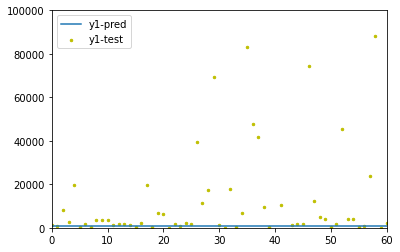

In [ ]:
x_ax = range(len(val_X))
plt.scatter(x_ax, val_Y.iloc[:,0],  s=6, c='y', label="y1-test")
plt.plot(x_ax, pred_Y[:,0], label="y1-pred")
plt.ylim(0,100000)
plt.xlim(0,60)

plt.legend()
plt.show()


In [ ]:
# Bayesian Optimization
#Définissez le choix et la plage de chaque paramètre.
#Remarque: le paramètre est type: continuous、type:Doit être écrit dans un ordre discret.
#Sinon, une erreur se produira dans le processus suivant.
bounds = [{'name': 'validation_split', 'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l1_out',           'type': 'discrete',    'domain': (8, 16, 32, 64, 128)},
          {'name': 'l2_out',           'type': 'discrete',    'domain': (8, 16, 32, 64, 128)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (20, 30, 40, 50, 60)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (100, 150, 200, 250)},
          {'name': 'l3_out',           'type': 'discrete',    'domain': (8, 16, 32, 64, 128)},
          {'name': 'l4_out',           'type': 'discrete',    'domain': (8, 16, 32, 64, 128)}]

#Définissez une fonction pour l'optimisation bayésienne (boîte noire décrite ci-dessus).
#x est l'entrée et la sortie est renvoyée.
def f(x):
    print(x)
    l1_out = int(x[:,1]),
    l2_out = int(x[:,2]),
    l3_out = int(x[:,5]),
    l4_out = int(x[:,6]),
    batch_size = int(x[:,3]), 
    epochs = int(x[:,4]), 
    validation_split = float(x[:,0])
    print('l1',str(l1_out[0]))
    print ('epochs',str(epochs[0]))
    print(batch_size[0])
    print(validation_split)

    model = Sequential()
    model.add(Dense(l1_out[0], input_dim=first_input ,kernel_initializer='he_uniform', activation='elu'))
    model.add(Dense(l2_out[0], activation='elu'))
    model.add(Dense(l3_out[0], activation='elu'))
    model.add(Dense(l4_out[0], activation='elu'))
    model.add(Dense(last_output))

    model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

    model.fit(train_X, train_Y,verbose=2, epochs=epochs[0], batch_size=batch_size[0], validation_split=validation_split)
    evaluation = model.evaluate(val_X, val_Y, batch_size=batch_size[0], verbose=0)
    return evaluation[0]

#Effectuez une recherche préliminaire.
opt_mnist = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds)

#Recherchez les meilleurs paramètres.
opt_mnist.run_optimization(max_iter=20)
print("optimized parameters: {0}".format(opt_mnist.x_opt))
print("optimized loss: {0}".format(opt_mnist.fx_opt))


Streaming output truncated to the last 5000 lines.
23/23 - 0s - loss: 78701.4141 - accuracy: 0.5793 - val_loss: 19553.9180 - val_accuracy: 0.6321 - 100ms/epoch - 4ms/step
Epoch 138/250
23/23 - 0s - loss: 78667.5703 - accuracy: 0.5725 - val_loss: 19445.4336 - val_accuracy: 0.6477 - 78ms/epoch - 3ms/step
Epoch 139/250
23/23 - 0s - loss: 78605.1172 - accuracy: 0.5988 - val_loss: 19432.4922 - val_accuracy: 0.6010 - 87ms/epoch - 4ms/step
Epoch 140/250
23/23 - 0s - loss: 78690.0234 - accuracy: 0.5702 - val_loss: 19662.3496 - val_accuracy: 0.6477 - 80ms/epoch - 3ms/step
Epoch 141/250
23/23 - 0s - loss: 78852.1250 - accuracy: 0.4628 - val_loss: 19390.9473 - val_accuracy: 0.6425 - 78ms/epoch - 3ms/step
Epoch 142/250
23/23 - 0s - loss: 78676.2188 - accuracy: 0.5702 - val_loss: 19520.7910 - val_accuracy: 0.5959 - 81ms/epoch - 4ms/step
Epoch 143/250
23/23 - 0s - loss: 78691.5078 - accuracy: 0.5763 - val_loss: 19447.4668 - val_accuracy: 0.6425 - 77ms/epoch - 3ms/step
Epoch 144/250
23/23 - 0s - loss

In [ ]:
import plotly.graph_objects as go
def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()



In [ ]:
plot_distribution(df2['organization_type'])

In [ ]:
import plotly.express as px
fig = px.histogram(df2, x="total_scope_1", nbins=20)
fig.update_layout(title_text='Age distribution')
fig.show()